# Decision Tree Model

A building block to Random Forest is a Decision Tree. Decision trees start with a root node and end with a leaf node. For numeric feature, tree split on each unique value of each data.  Tree-based models may poorly handle trends in data, compared to linear models, so you have to detrend your series first, which was done in the previous part for three of the five datasets.

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

In [2]:
# load data
df1 = pd.read_csv('vacation_lags_12months_features.csv', header=0)
df1.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0
1,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0
2,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0
3,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0,-16.0
4,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0,13.0,-4.0,-16.0,-20.0


In [3]:
# Split data

vacat = df1.values
# split into lagged variables and original time series
X1= vacat[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 = vacat[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [4]:
# Columns t-1 to t-12, which are the lagged variables
X1

array([[ 10.,   9.,  -2., ...,  -6.,  -3., -11.],
       [  9.,  -2., -17., ...,  -3., -11.,   3.],
       [ -2., -17., -18., ..., -11.,   3.,  13.],
       ...,
       [-11., -12.,  -1., ...,   1.,  11.,  -2.],
       [-12.,  -1.,   4., ...,  11.,  -2., -11.],
       [ -1.,   4.,  15., ...,  -2., -11.,  -7.]])

In [5]:
# Column t, which is the original time series
y1[0:10]

array([  3.,  13.,  -4., -16., -20.,  -2.,   3.,   3.,  30., -11.])

In [6]:
# Target Train-Test split
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1) * 0.80)   # Set split
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]

print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 174
Training Observations for Target: 139
Testing Observations for Target: 35


In [7]:
# Features Train-Test split

trainfeature_size = int(len(X1) * 0.80)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 174
Training Observations for feature: 139
Testing Observations for feature: 35


In [8]:
# Decision Tree Regresion Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_vacat = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features and targets
decision_tree_vacat.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_vacat.score(train_feature, train_target))
print(decision_tree_vacat.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
0.5360087877693511


In [9]:
# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_vacat = DecisionTreeRegressor(max_depth=d)
    decision_tree_vacat.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_vacat.score(train_feature, train_target))
    print(decision_tree_vacat.score(test_feature, test_target), '\n')  # You want the test score to be positive and high
 


max_depth= 2
0.836755084049483
0.5100670898047248 

max_depth= 3
0.9202849260705976
0.5338183325628844 

max_depth= 4
0.9505108563131668
0.5424299225198469 

max_depth= 5
0.9731320934255739
0.551324477014031 

max_depth= 7
0.9945227439718145
0.5471729107122062 

max_depth= 8
0.9979417202626701
0.5195997551668032 

max_depth= 10
0.9998990581954493
0.5333169482230514 



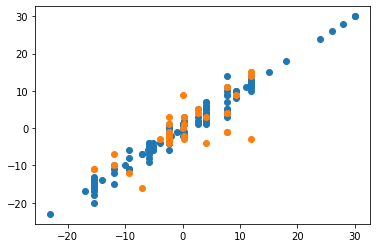

In [10]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_vacat = DecisionTreeRegressor(max_depth=5)  # fill in best max depth here
decision_tree_vacat.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_vacat.predict(train_feature)
test_prediction = decision_tree_vacat.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()

## Example 2:  Bank of America Dataset

In [11]:
# load data, this data has been stationarized
df3 = pd.read_csv('bac_lags_12months_features.csv', header=0)
df3.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,1.687537,1.469485,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093
1,1.469485,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426
2,1.441042,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101
3,1.525887,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101,1.941008
4,1.476664,1.412676,1.341841,0.879137,0.709480,0.987102,1.002662,1.232781,1.282093,1.595426,1.699101,1.941008,1.707245


In [12]:
# Split Data

bac = df3.values
# split into lagged variables (features) and original time series data (target)
X3= bac[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y3 = bac[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [13]:
# Columns t-1 to t-12, which are the lagged variables
X3

array([[ 1.68753707,  1.46948457,  1.44104242, ...,  0.98710191,
         1.00266206,  1.23278129],
       [ 1.46948457,  1.44104242,  1.52588725, ...,  1.00266206,
         1.23278129,  1.28209293],
       [ 1.44104242,  1.52588725,  1.47666395, ...,  1.23278129,
         1.28209293,  1.59542644],
       ...,
       [30.09263229, 28.80098343, 26.88482857, ..., 26.28380585,
        28.81011391, 30.47911263],
       [28.80098343, 26.88482857, 27.76469421, ..., 28.81011391,
        30.47911263, 27.32987022],
       [26.88482857, 27.76469421, 24.22343063, ..., 30.47911263,
        27.32987022, 29.17000008]])

In [14]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
y3[0:10]

array([1.28209293, 1.59542644, 1.69910097, 1.94100773, 1.70724475,
       1.65948939, 1.91634405, 1.76750135, 1.85432637, 1.70548344])

In [15]:
# Target Train-Test split
from pandas import read_csv

Y3 = y3
traintarget_size = int(len(Y3) * 0.75)   # Set split
train_target, test_target = Y3[0:traintarget_size], Y3[traintarget_size:len(Y3)]

print('Observations for Target: %d' % (len(Y3)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 345
Training Observations for Target: 258
Testing Observations for Target: 87


In [16]:
# Features Train-Test split

trainfeature_size = int(len(X3) * 0.75)
train_feature, test_feature = X3[0:trainfeature_size], X3[trainfeature_size:len(X3)]
print('Observations for feature: %d' % (len(X3)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 345
Training Observations for feature: 258
Testing Observations for feature: 87


In [17]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_bac = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree_bac.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_bac.score(train_feature, train_target))
print(decision_tree_bac.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
0.9060748978048632


In [18]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3,4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_bac = DecisionTreeRegressor(max_depth=d)
    decision_tree_bac.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_bac.score(train_feature, train_target))
    print(decision_tree_bac.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 

max_depth= 2
0.9378916189370203
0.8319966734609072 

max_depth= 3
0.9762695646725685
0.9340343778452675 

max_depth= 4
0.9862060481571319
0.9543748902590434 

max_depth= 5
0.9930499411129009
0.9283818886973885 

max_depth= 7
0.9985248221522022
0.9129533508605636 

max_depth= 8
0.999461138644182
0.9096923998161675 

max_depth= 10
0.9999516846017653
0.9125751533417074 



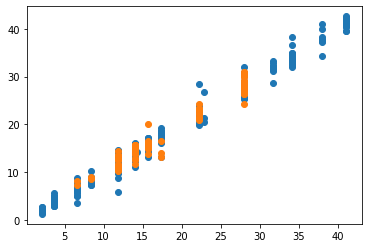

In [19]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_bac = DecisionTreeRegressor(max_depth=4) 
decision_tree_bac.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_bac.predict(train_feature)
test_prediction = decision_tree_bac.predict(test_feature)

# Scatter the predictions vs actual values
plt.scatter(train_prediction, train_target, label='train')
plt.scatter(test_prediction, test_target, label='test')
plt.show()

## Summary

In summary, we looked at a decision tree model on both datasets that consisted of 12 lagged variables.  The datasets were split into features and target. It was further split according to a training and test datasets. We determined that the best max_depth based on the best R-squared score on the test dataset model, which was max_depth with the highest and positive score. The max_depth determines the number of splits and is, essentially, the height of the tree. The scatterplot displays both the predicted and actual values. The decision tree models predicted training data better than test data.

In [ ]:
# End